In [1]:
# Regularized Regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Dataset:
The dataset for this exercise is obtained from this link: 

https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64 

**File Name**: 2021 Fuel Consumption Ratings (2021-09-29)

In [2]:
# Import the dataset:
df_full = pd.read_csv('FuelConsumption.csv')

In [3]:
df_full.head()

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,FuelType,FuelConsumptionCity(L),FuelConsumptionHwy(L),FuelConsumptionComb(L),FuelConsumptionComb(mpg),CO2Emissions,CO2Rating,SmogRating
0,2021,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,256,4,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [4]:
df_full.tail()

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,FuelType,FuelConsumptionCity(L),FuelConsumptionHwy(L),FuelConsumptionComb(L),FuelConsumptionComb(mpg),CO2Emissions,CO2Rating,SmogRating
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,Z,11.1,8.3,9.9,29,230,5,5
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,5,7
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5
934,2021,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.1,8.5,10.5,27,245,5,7


In [5]:
df_full.describe()

,Year,Engine Size,Cylinders,FuelConsumptionCity(L),FuelConsumptionHwy(L),FuelConsumptionComb(L),FuelConsumptionComb(mpg),CO2Emissions,CO2Rating,SmogRating
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,27.345455,258.529412,4.357219,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,7.730569,64.442768,1.640849,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,22.000000,213.000000,3.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,26.000000,255.000000,4.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,31.000000,303.500000,5.000000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      935 non-null    int64  
 1   Make                      935 non-null    object 
 2   Model                     935 non-null    object 
 3   Vehicle Class             935 non-null    object 
 4   Engine Size               935 non-null    float64
 5   Cylinders                 935 non-null    int64  
 6   Transmission              935 non-null    object 
 7   FuelType                  935 non-null    object 
 8   FuelConsumptionCity(L)    935 non-null    float64
 9   FuelConsumptionHwy(L)     935 non-null    float64
 10  FuelConsumptionComb(L)    935 non-null    float64
 11  FuelConsumptionComb(mpg)  935 non-null    int64  
 12  CO2Emissions              935 non-null    int64  
 13  CO2Rating                 935 non-null    int64  
 14  SmogRating

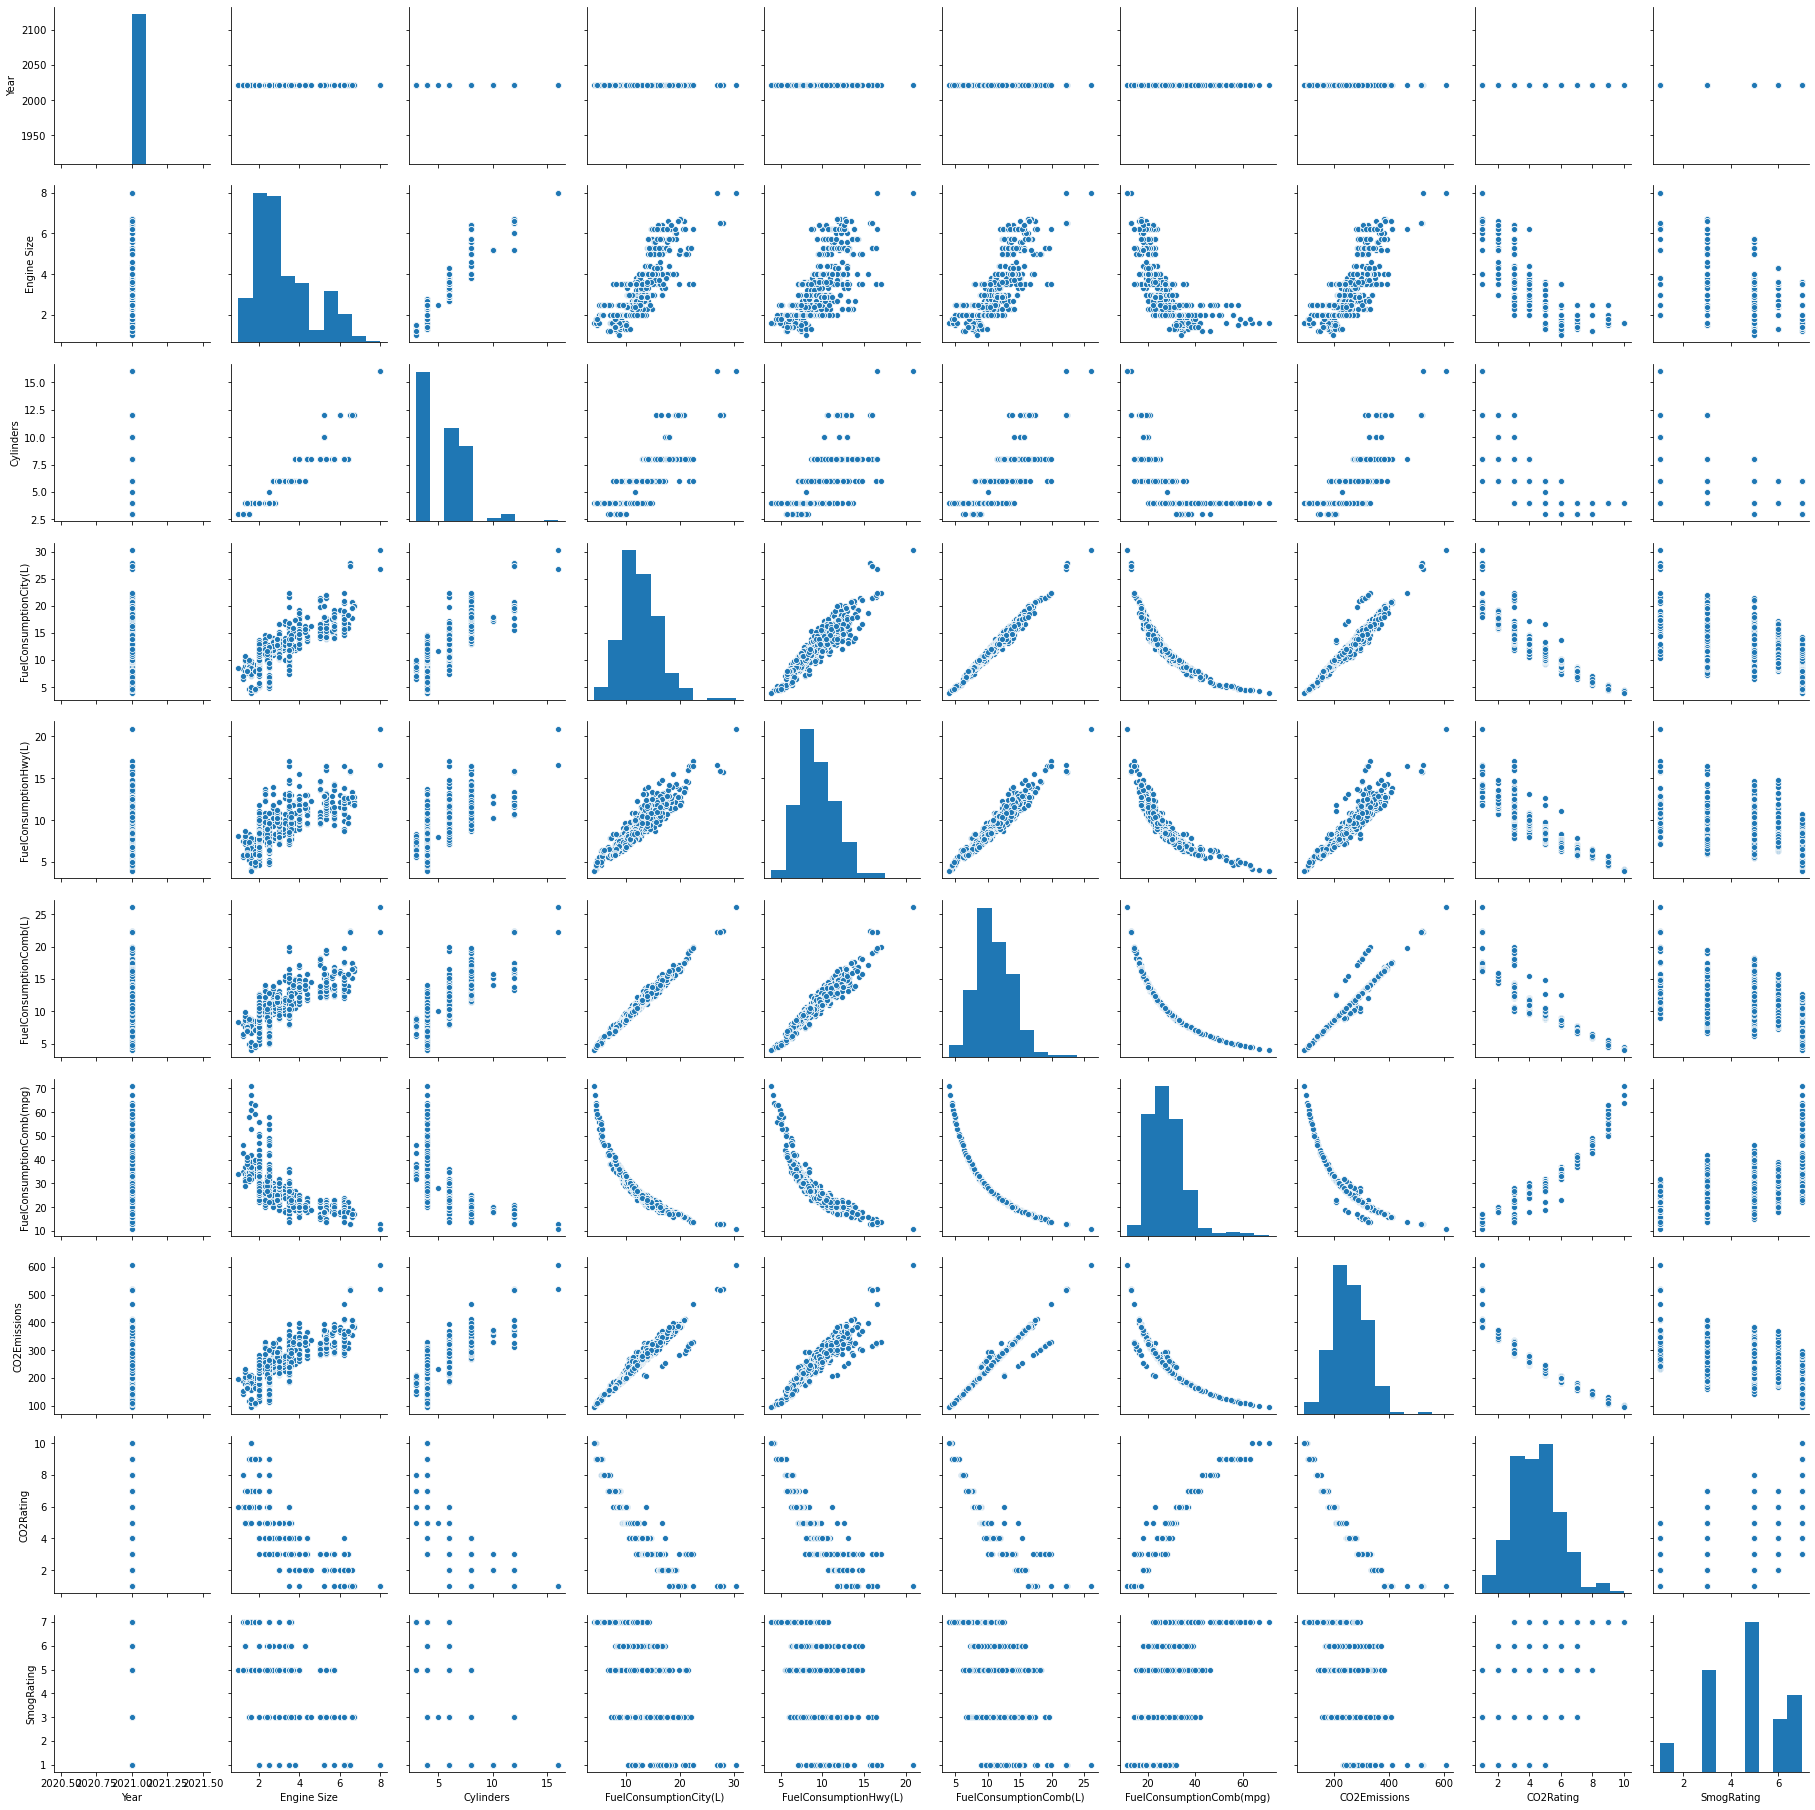

In [7]:
sns.pairplot(df_full)

In [8]:
df_full.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'FuelType', 'FuelConsumptionCity(L)',
       'FuelConsumptionHwy(L)', 'FuelConsumptionComb(L)',
       'FuelConsumptionComb(mpg)', 'CO2Emissions', 'CO2Rating', 'SmogRating'],
      dtype='object')

In [10]:
features_X = ['Year', 'Engine Size', 'Cylinders', 'FuelConsumptionCity(L)', 'FuelConsumptionHwy(L)', 'FuelConsumptionComb(L)','FuelConsumptionComb(mpg)']
X = df_full[features_X].values
X

array([[2.021e+03, 2.400e+00, 4.000e+00, ..., 7.000e+00, 8.600e+00,
        3.300e+01],
       [2.021e+03, 3.500e+00, 6.000e+00, ..., 1.080e+01, 1.100e+01,
        2.600e+01],
       [2.021e+03, 2.000e+00, 4.000e+00, ..., 8.600e+00, 9.900e+00,
        2.900e+01],
       ...,
       [2.021e+03, 2.000e+00, 4.000e+00, ..., 8.600e+00, 1.030e+01,
        2.700e+01],
       [2.021e+03, 2.000e+00, 4.000e+00, ..., 8.400e+00, 1.010e+01,
        2.800e+01],
       [2.021e+03, 2.000e+00, 4.000e+00, ..., 8.500e+00, 1.050e+01,
        2.700e+01]])

In [12]:
predictor = ['CO2Emissions']
Y = df_full[predictor].values
Y

array([[199],
       [256],
       [232],
       [242],
       [230],
       [231],
       [205],
       [217],
       [271],
       [218],
       [226],
       [288],
       [271],
       [312],
       [324],
       [357],
       [270],
       [333],
       [208],
       [194],
       [205],
       [212],
       [205],
       [205],
       [247],
       [214],
       [227],
       [227],
       [267],
       [308],
       [218],
       [239],
       [217],
       [217],
       [264],
       [281],
       [281],
       [329],
       [353],
       [329],
       [353],
       [269],
       [266],
       [319],
       [315],
       [360],
       [237],
       [244],
       [237],
       [237],
       [255],
       [255],
       [339],
       [274],
       [274],
       [324],
       [324],
       [216],
       [216],
       [232],
       [220],
       [309],
       [383],
       [290],
       [364],
       [290],
       [373],
       [323],
       [373],
       [206],
       [225],
      

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [14]:
print(X_train.shape)

(748, 7)


In [15]:
print(X_test.shape)

(187, 7)


In [16]:
print(Y_train.shape)

(748, 1)


In [17]:
print(Y_test.shape)

(187, 1)


In [19]:
from sklearn.linear_model import LinearRegression, Ridge
lm = LinearRegression().fit(X_train,Y_train)

In [20]:
lm.coef_

array([[  0.        ,   1.5016734 ,   3.47601848, -17.6461491 ,
        -14.30882232,  46.98047936,  -1.67300697]])

In [21]:
lm.intercept_

array([113.70839398])

In [22]:
Lm_predication=lm.predict(X_test)

In [28]:
diff = (Y_test-Lm_predication)
comp = pd.DataFrame({"Actual_Data":Y_test.flatten(), "New_Predication":Lm_predication.flatten(), "Error":diff.flatten()})  
comp

,Actual_Data,New_Predication,Error
0,382,366.600815,15.399185
1,179,181.669438,-2.669438
2,263,258.653136,4.346864
3,318,309.116717,8.883283
4,271,274.335313,-3.335313
...,...,...,...
182,353,351.617294,1.382706
183,228,238.519840,-10.519840
184,208,210.009020,-2.009020
185,235,234.206022,0.793978


In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
print('MSE: ', mean_squared_error(Y_test,Lm_predication))

MSE:  244.06139639308054


In [35]:
Trian_Score = lm.score(X_train,Y_train) 
print("Train Score of a model is: ",Trian_Score)

Train Score of a model is:  0.9535458284608291


In [36]:
Test_Score = lm.score(X_test,Lm_predication)   
print("Test Score of a Model is: ",Test_Score)

Test Score of a Model is:  1.0


**(1)** If Train Score is More then Test Score we can called it as **Overfitting**

**(2)** if Train Score is less and Test Score is More then it is called **Underfitting**

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
CV = cross_val_score(lm,X_train,Y_train,cv=20)
CV

array([0.96442366, 0.9336069 , 0.90489918, 0.9867974 , 0.96905701,
       0.89456028, 0.92777335, 0.9625161 , 0.98689573, 0.98949749,
       0.98130213, 0.87317291, 0.99403343, 0.98300733, 0.94199436,
       0.96096374, 0.93239449, 0.8528705 , 0.98810437, 0.94065768])

In [39]:
np.mean(CV)

0.9484264026343906

In [40]:
np.max(CV)

0.9940334321856755

In [41]:
np.min(CV)

0.8528705011838265

In [42]:
from sklearn.model_selection import KFold

In [43]:
Cv_k = KFold(n_splits=2)

In [44]:
Cv_k.get_n_splits(X_test)

2

In [45]:
print(Cv_k)

KFold(n_splits=2, random_state=None, shuffle=False)


In [47]:
for train_index,test_index in Cv_k.split(X_train):
    print("Train",train_index)
    print("Test",test_index)

Train [374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391
 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409
 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427
 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445
 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463
 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481
 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499
 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535
 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553
 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571
 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589
 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607
 608 609 610 611 612 613 614 615 616 617 618 

## Ridge Regulization

Ridge Formula: Sum of Error + Sum of the squares of coefficients

In [48]:
Rg = Ridge(alpha=1) ## Regulization parameters

In [49]:
Rg.fit(X_train,Y_train)

Ridge(alpha=1)

In [50]:
Rg.coef_

array([[ 0.        ,  1.44217088,  3.43834861, -3.35987194, -2.67823317,
        21.09408349, -1.6744253 ]])

In [57]:
features_X = ['Year', 'Engine Size', 'Cylinders', 'FuelConsumptionCity(L)', 'FuelConsumptionHwy(L)', 'FuelConsumptionComb(L)','FuelConsumptionComb(mpg)']
X_names = df_full[features_X].columns
X_names

Index(['Year', 'Engine Size', 'Cylinders', 'FuelConsumptionCity(L)',
       'FuelConsumptionHwy(L)', 'FuelConsumptionComb(L)',
       'FuelConsumptionComb(mpg)'],
      dtype='object')

In [62]:
pd.DataFrame({"Features":X_names, "Linear_Coefficent":lm.coef_.flatten(), "Ridge_Coefficent":Rg.coef_.flatten()})

,Features,Linear_Coefficent,Ridge_Coefficent
0,Year,0.000000,0.000000
1,Engine Size,1.501673,1.442171
2,Cylinders,3.476018,3.438349
3,FuelConsumptionCity(L),-17.646149,-3.359872
4,FuelConsumptionHwy(L),-14.308822,-2.678233
5,FuelConsumptionComb(L),46.980479,21.094083
6,FuelConsumptionComb(mpg),-1.673007,-1.674425


In [63]:
Rg.intercept_

array([113.66839699])

In [64]:
Rg_predicted = Rg.predict(X_test)

In [68]:
diff = (Y_test-Lm_predication)
diff_r = (Y_test-Rg_predicted)
comp = pd.DataFrame({"Actual_Data":Y_test.flatten(), "Linear_Predication":Lm_predication.flatten(), "Linear_Error":diff.flatten(),
                    "Ridge_Prediction": Rg_predicted.flatten(), "Ridge_Error":diff_r.flatten()})  
comp

,Actual_Data,Linear_Predication,Linear_Error,Ridge_Prediction,Ridge_Error
0,382,366.600815,15.399185,366.255285,15.744715
1,179,181.669438,-2.669438,182.500345,-3.500345
2,263,258.653136,4.346864,258.140478,4.859522
3,318,309.116717,8.883283,308.573271,9.426729
4,271,274.335313,-3.335313,274.379490,-3.379490
...,...,...,...,...,...
182,353,351.617294,1.382706,350.985207,2.014793
183,228,238.519840,-10.519840,237.664091,-9.664091
184,208,210.009020,-2.009020,209.855558,-1.855558
185,235,234.206022,0.793978,234.561934,0.438066


In [71]:
print('MSE (Linear): ', mean_squared_error(Y_test,Lm_predication))
print("MSE (Ridge): ", mean_squared_error(Y_test,Rg_predicted))

MSE (Linear):  244.06139639308054
MSE (Ridge):  237.97678835829402


In [72]:
# Ridge Cross Validation Process
from sklearn.linear_model import RidgeCV

In [73]:
Ridge_CV = RidgeCV()

In [74]:
Ridge_CV.fit(X_train,Y_train)   # Train Data

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [75]:
Ridge_CV.coef_

array([[  0.        ,   1.48767746,   3.46787739, -14.4304524 ,
        -11.69051107,  41.15408191,  -1.67313045]])

In [76]:
Ridge_CV.intercept_

array([113.68641364])

In [77]:
Ridge_CV_predication = Ridge_CV.predict(X_test)  ## Test Data

In [78]:
diff = (Y_test-Lm_predication)
diff_r = (Y_test-Rg_predicted)
diff_r_cv = (Y_test-Ridge_CV_predication)
comp = pd.DataFrame({"Actual_Data":Y_test.flatten(), "Linear_Predication":Lm_predication.flatten(), "Linear_Error":diff.flatten(),
                    "Ridge_Prediction": Rg_predicted.flatten(), "Ridge_Error":diff_r.flatten(),
                    "Ridge_CV_Prediction": Ridge_CV_predication.flatten(), "Ridge_CV_Error":diff_r_cv.flatten()})  
comp

,Actual_Data,Linear_Predication,Linear_Error,Ridge_Prediction,Ridge_Error,Ridge_CV_Prediction,Ridge_CV_Error
0,382,366.600815,15.399185,366.255285,15.744715,366.524111,15.475889
1,179,181.669438,-2.669438,182.500345,-3.500345,181.856250,-2.856250
2,263,258.653136,4.346864,258.140478,4.859522,258.537461,4.462539
3,318,309.116717,8.883283,308.573271,9.426729,308.994349,9.005651
4,271,274.335313,-3.335313,274.379490,-3.379490,274.344666,-3.344666
...,...,...,...,...,...,...,...
182,353,351.617294,1.382706,350.985207,2.014793,351.476174,1.523826
183,228,238.519840,-10.519840,237.664091,-9.664091,238.326781,-10.326781
184,208,210.009020,-2.009020,209.855558,-1.855558,209.973614,-1.973614
185,235,234.206022,0.793978,234.561934,0.438066,234.285735,0.714265


In [79]:
print('MSE (Linear): ', mean_squared_error(Y_test,Lm_predication))
print("MSE (Ridge): ", mean_squared_error(Y_test,Rg_predicted))
print("MSE (Ridge_CV): ", mean_squared_error(Y_test,Ridge_CV_predication))

MSE (Linear):  244.06139639308054
MSE (Ridge):  237.97678835829402
MSE (Ridge_CV):  242.33520316288107


In [80]:
CV = cross_val_score(Ridge_CV,X_train,Y_train,cv=20)
CV

array([0.9643185 , 0.93402274, 0.90486084, 0.98676937, 0.96906634,
       0.89488963, 0.92755208, 0.96249339, 0.98691257, 0.98986961,
       0.98133376, 0.87279598, 0.99395124, 0.98300875, 0.94183924,
       0.96067645, 0.93280536, 0.85291572, 0.9880214 , 0.94041751])

In [81]:
np.min(CV)

0.8529157156588253

In [82]:
np.max(CV)

0.9939512409599431

In [83]:
np.mean(CV)

0.9484260235850808

## Lasso(L1):

Lasso Formula: Lasso = Sum of Error + Sum of the absolute value of coefficients

In [84]:
from sklearn.linear_model import Lasso

In [85]:
ls = Lasso(alpha=1.0)

In [86]:
ls.fit(X_train,Y_train)

Lasso()

In [88]:
Lasso_Train_Score = ls.score(X_train,Y_train)

In [90]:
print("Train Score For Lasso: ",Lasso_Train_Score)

Train Score For Lasso:  0.9527444938176864


In [92]:
Lasso_Test_Score = ls.score(X_test,Y_test)

In [93]:
print("Test Score For Lasso: ",Lasso_Test_Score)

Test Score For Lasso:  0.949767759904405


In [94]:
ls.coef_

array([ 0.        ,  0.        ,  3.676212  ,  4.29481659,  2.36557412,
        8.16269855, -1.77215595])

In [95]:
pd.DataFrame({"Features":X_names, "Linear_Coefficent":lm.coef_.flatten(), 
              "Ridge_Coefficent":Rg.coef_.flatten(), "Lasso_Coefficient":ls.coef_.flatten() })

,Features,Linear_Coefficent,Ridge_Coefficent,Lasso_Coefficient
0,Year,0.000000,0.000000,0.000000
1,Engine Size,1.501673,1.442171,0.000000
2,Cylinders,3.476018,3.438349,3.676212
3,FuelConsumptionCity(L),-17.646149,-3.359872,4.294817
4,FuelConsumptionHwy(L),-14.308822,-2.678233,2.365574
5,FuelConsumptionComb(L),46.980479,21.094083,8.162699
6,FuelConsumptionComb(mpg),-1.673007,-1.674425,-1.772156


In [96]:
ls_predication = ls.predict(X_test)

In [97]:
Lasso_Error = mean_squared_error(Y_test,ls_predication)
Lasso_Error

243.8669258843185

In [115]:
diff_lasso = (Y_test-ls_predication)
comp = pd.DataFrame({"Actual_Data":Y_test.flatten(), "Linear_Predication":Lm_predication.flatten(), 
                    "Ridge_Prediction": Rg_predicted.flatten(), 
                    "Ridge_CV_Prediction": Ridge_CV_predication.flatten(), 
                    "Lasso_Prediction": ls_predication.flatten()})  
comp

,Actual_Data,Linear_Predication,Ridge_Prediction,Ridge_CV_Prediction,Lasso_Prediction
0,382,366.600815,366.255285,366.524111,363.225919
1,179,181.669438,182.500345,181.856250,183.090429
2,263,258.653136,258.140478,258.537461,257.289940
3,318,309.116717,308.573271,308.994349,307.087297
4,271,274.335313,274.379490,274.344666,273.457668
...,...,...,...,...,...
182,353,351.617294,350.985207,351.476174,350.316603
183,228,238.519840,237.664091,238.326781,237.871694
184,208,210.009020,209.855558,209.973614,210.230422
185,235,234.206022,234.561934,234.285735,234.229398


In [108]:
print('MSE (Linear): ', mean_squared_error(Y_test,Lm_predication))
print("MSE (Ridge): ", mean_squared_error(Y_test,Rg_predicted))
print("MSE (Ridge_CV): ", mean_squared_error(Y_test,Ridge_CV_predication))
print("MSE (Lasso): ", mean_squared_error(Y_test,ls_predication))

MSE (Linear):  244.06139639308054
MSE (Ridge):  237.97678835829402
MSE (Ridge_CV):  242.33520316288107
MSE (Lasso):  243.8669258843185


In [116]:
## Lasso Cross Validation
from sklearn.linear_model import LassoCV

In [117]:
Lasso_cv = LassoCV(alphas=[0.1,1])

In [118]:
Lasso_cv.fit(X_train,Y_train)

LassoCV(alphas=[0.1, 1])

In [119]:
Lasso_cv_Predictation = Lasso_cv.predict(X_test)

In [120]:
comp = pd.DataFrame({"Actual_Data":Y_test.flatten(), "Linear_Predication":Lm_predication.flatten(), 
                    "Ridge_Prediction": Rg_predicted.flatten(), 
                    "Ridge_CV_Prediction": Ridge_CV_predication.flatten(), 
                    "Lasso_Prediction": ls_predication.flatten(),
                    "Lasso_CV_Prediction": Lasso_cv_Predictation.flatten()})  
comp

,Actual_Data,Linear_Predication,Ridge_Prediction,Ridge_CV_Prediction,Lasso_Prediction,Lasso_CV_Prediction
0,382,366.600815,366.255285,366.524111,363.225919,365.861453
1,179,181.669438,182.500345,181.856250,183.090429,182.933047
2,263,258.653136,258.140478,258.537461,257.289940,257.830854
3,318,309.116717,308.573271,308.994349,307.087297,308.193661
4,271,274.335313,274.379490,274.344666,273.457668,274.280165
...,...,...,...,...,...,...
182,353,351.617294,350.985207,351.476174,350.316603,350.643352
183,228,238.519840,237.664091,238.326781,237.871694,237.247543
184,208,210.009020,209.855558,209.973614,210.230422,209.793463
185,235,234.206022,234.561934,234.285735,234.229398,234.688862


In [121]:
print('MSE (Linear): ', mean_squared_error(Y_test,Lm_predication))
print("MSE (Ridge): ", mean_squared_error(Y_test,Rg_predicted))
print("MSE (Ridge_CV): ", mean_squared_error(Y_test,Ridge_CV_predication))
print("MSE (Lasso): ", mean_squared_error(Y_test,ls_predication))
print("MSE (Lasso_CV): ", mean_squared_error(Y_test,Lasso_cv_Predictation))

MSE (Linear):  244.06139639308054
MSE (Ridge):  237.97678835829402
MSE (Ridge_CV):  242.33520316288107
MSE (Lasso):  243.8669258843185
MSE (Lasso_CV):  236.89250210582628


## Elastic Net Formula: Ridge + Lasso
Elastic Net combines characteristics of both lasso and ridge. Elastic Net reduces the impact of different features while not eliminating all of the features.

In [122]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [123]:
Enet = ElasticNet(alpha=0.1,l1_ratio=0.5) 

In [124]:
Enet.fit(X_train,Y_train)

ElasticNet(alpha=0.1)

In [125]:
Enet_predication = Enet.predict(X_test)

In [126]:
comp = pd.DataFrame({"Actual_Data":Y_test.flatten(), "Linear_Predication":Lm_predication.flatten(), 
                    "Ridge_Prediction": Rg_predicted.flatten(), 
                    "Ridge_CV_Prediction": Ridge_CV_predication.flatten(), 
                    "Lasso_Prediction": ls_predication.flatten(),
                    "Lasso_CV_Prediction": Lasso_cv_Predictation.flatten(),
                    "ENet_Prediction": Enet_predication.flatten()})  
comp

,Actual_Data,Linear_Predication,Ridge_Prediction,Ridge_CV_Prediction,Lasso_Prediction,Lasso_CV_Prediction,ENet_Prediction
0,382,366.600815,366.255285,366.524111,363.225919,365.861453,365.605631
1,179,181.669438,182.500345,181.856250,183.090429,182.933047,183.062736
2,263,258.653136,258.140478,258.537461,257.289940,257.830854,257.887024
3,318,309.116717,308.573271,308.994349,307.087297,308.193661,308.191881
4,271,274.335313,274.379490,274.344666,273.457668,274.280165,274.515840
...,...,...,...,...,...,...,...
182,353,351.617294,350.985207,351.476174,350.316603,350.643352,350.282739
183,228,238.519840,237.664091,238.326781,237.871694,237.247543,237.311873
184,208,210.009020,209.855558,209.973614,210.230422,209.793463,210.013377
185,235,234.206022,234.561934,234.285735,234.229398,234.688862,234.862912


In [127]:
Enet_Train_score = Enet.score(X_train,Y_train)

In [128]:
Enet_Train_score

0.9529943759341641

In [129]:
Enet_Test_score =Enet.score(X_test,Enet_predication)

In [130]:
Enet_Test_score

1.0

In [131]:
Enet_cv = ElasticNetCV()

In [132]:
Enet_cv.fit(X_train,Y_train)

ElasticNetCV()

In [133]:
Enet_cv_predict=Enet_cv.predict(X_test)

In [134]:
comp = pd.DataFrame({"Actual_Data":Y_test.flatten(), "Linear_Predication":Lm_predication.flatten(), 
                    "Ridge_Prediction": Rg_predicted.flatten(), 
                    "Ridge_CV_Prediction": Ridge_CV_predication.flatten(), 
                    "Lasso_Prediction": ls_predication.flatten(),
                    "Lasso_CV_Prediction": Lasso_cv_Predictation.flatten(),
                    "ENet_Prediction": Enet_predication.flatten(),
                    "ENet_CV_Prediction": Enet_cv_predict.flatten()})  
comp

,Actual_Data,Linear_Predication,Ridge_Prediction,Ridge_CV_Prediction,Lasso_Prediction,Lasso_CV_Prediction,ENet_Prediction,ENet_CV_Prediction
0,382,366.600815,366.255285,366.524111,363.225919,365.861453,365.605631,362.472111
1,179,181.669438,182.500345,181.856250,183.090429,182.933047,183.062736,183.591500
2,263,258.653136,258.140478,258.537461,257.289940,257.830854,257.887024,258.438700
3,318,309.116717,308.573271,308.994349,307.087297,308.193661,308.191881,307.584493
4,271,274.335313,274.379490,274.344666,273.457668,274.280165,274.515840,275.157764
...,...,...,...,...,...,...,...,...
182,353,351.617294,350.985207,351.476174,350.316603,350.643352,350.282739,348.109254
183,228,238.519840,237.664091,238.326781,237.871694,237.247543,237.311873,238.380526
184,208,210.009020,209.855558,209.973614,210.230422,209.793463,210.013377,211.444807
185,235,234.206022,234.561934,234.285735,234.229398,234.688862,234.862912,235.723545


In [135]:
print('MSE (Linear): ', mean_squared_error(Y_test,Lm_predication))
print("MSE (Ridge): ", mean_squared_error(Y_test,Rg_predicted))
print("MSE (Ridge_CV): ", mean_squared_error(Y_test,Ridge_CV_predication))
print("MSE (Lasso): ", mean_squared_error(Y_test,ls_predication))
print("MSE (Lasso_CV): ", mean_squared_error(Y_test,Lasso_cv_Predictation))
print("MSE (ENet): ", mean_squared_error(Y_test,Enet_predication))
print("MSE (ENet_CV): ", mean_squared_error(Y_test,Enet_cv_predict))

MSE (Linear):  244.06139639308054
MSE (Ridge):  237.97678835829402
MSE (Ridge_CV):  242.33520316288107
MSE (Lasso):  243.8669258843185
MSE (Lasso_CV):  236.89250210582628
MSE (ENet):  238.23275948106087
MSE (ENet_CV):  255.79786310226123


## Feature Importance:

In [144]:
linear_coeff = lm.coef_
ridge_coeff = Ridge_CV.coef_
lasso_coeff = ls.coef_

linear_coeff_lst = linear_coeff.tolist()
linear_coeff_lst[0]

[0.0,
 1.5016733960091022,
 3.476018480449793,
 -17.64614910408908,
 -14.30882231875986,
 46.98047936148428,
 -1.673006967961837]

Feature: 0, Score: 0.00000
Feature: 1, Score: 1.50167
Feature: 2, Score: 3.47602
Feature: 3, Score: -17.64615
Feature: 4, Score: -14.30882
Feature: 5, Score: 46.98048
Feature: 6, Score: -1.67301


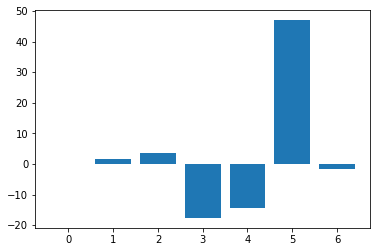

In [146]:
# get importance
# summarize feature importance
for i,v in enumerate(linear_coeff_lst[0]):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(linear_coeff_lst[0]))], linear_coeff_lst[0])
plt.show()

In [147]:
ridge_coeff = Ridge_CV.coef_

ridge_coeff_lst = ridge_coeff.tolist()
ridge_coeff_lst[0]

[0.0,
 1.4876774591748472,
 3.467877392621631,
 -14.430452396231885,
 -11.69051106534107,
 41.15408190791368,
 -1.673130450150893]

Feature: 0, Score: 0.00000
Feature: 1, Score: 1.48768
Feature: 2, Score: 3.46788
Feature: 3, Score: -14.43045
Feature: 4, Score: -11.69051
Feature: 5, Score: 41.15408
Feature: 6, Score: -1.67313


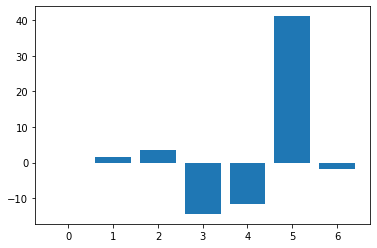

In [148]:
# get importance
# summarize feature importance
for i,v in enumerate(ridge_coeff_lst[0]):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(ridge_coeff_lst[0]))], ridge_coeff_lst[0])
plt.show()

In [150]:
lasso_coeff = ls.coef_

lasso_coeff_lst = lasso_coeff.tolist()
lasso_coeff_lst

[0.0,
 0.0,
 3.6762119979141126,
 4.294816586410862,
 2.3655741185919843,
 8.16269854586886,
 -1.7721559525932145]

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 3.67621
Feature: 3, Score: 4.29482
Feature: 4, Score: 2.36557
Feature: 5, Score: 8.16270
Feature: 6, Score: -1.77216


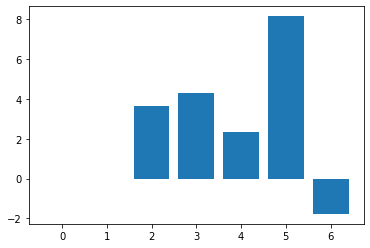

In [151]:
# get importance
# summarize feature importance
for i,v in enumerate(lasso_coeff_lst):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(lasso_coeff_lst))], lasso_coeff_lst)
plt.show()